In [9]:
# Titanic data analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# % matplotlib inline

import math

titanic_data = pd.read_csv('titanic.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
print("Number of passengers in original data: " + str(len(titanic_data.index)))

Number of passengers in original data: 891


## Analysis

<Axes: xlabel='Survived', ylabel='count'>

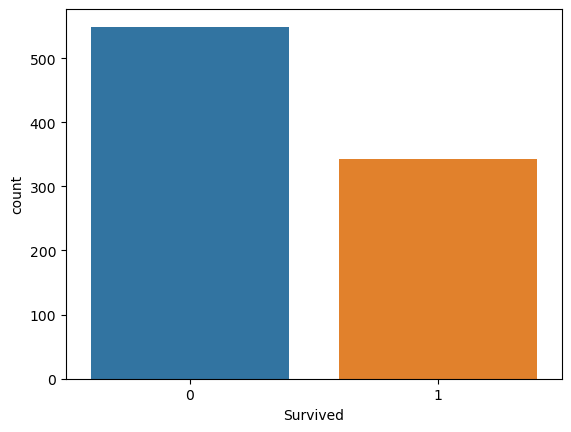

In [11]:
sns.countplot(x="Survived", data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

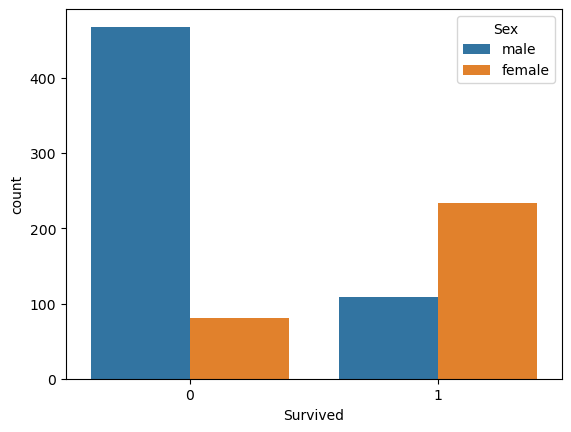

In [12]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

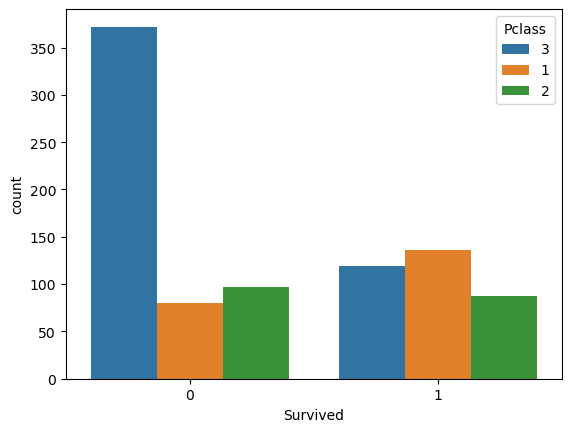

In [13]:
titanic_data['Pclass'] = titanic_data['Pclass'].astype('str')
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

<Axes: ylabel='Frequency'>

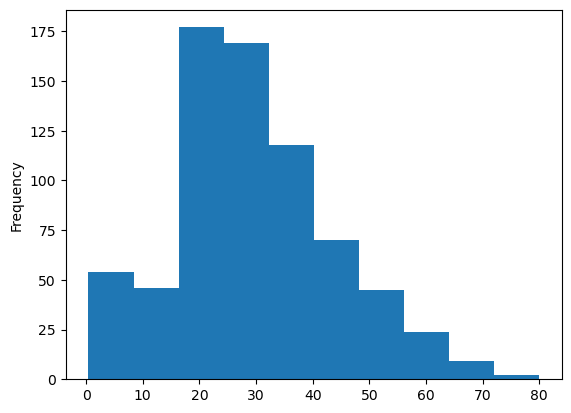

In [14]:
titanic_data["Age"].plot.hist()

<Axes: ylabel='Frequency'>

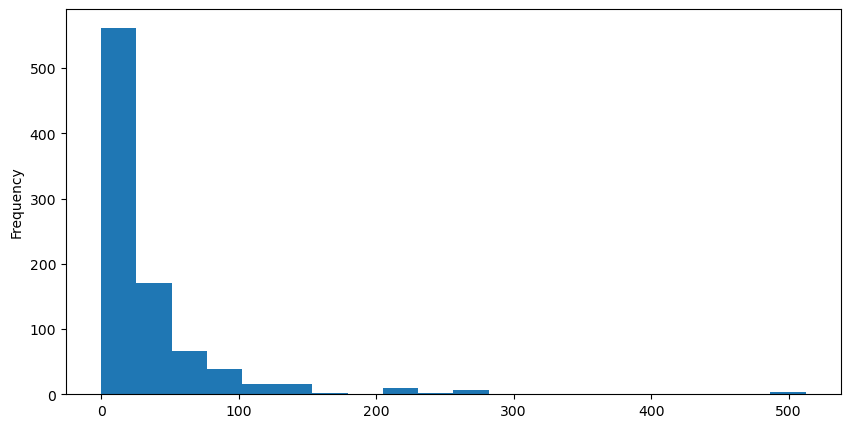

In [15]:
titanic_data["Fare"].plot.hist(bins=20, figsize=(10, 5))

In [16]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

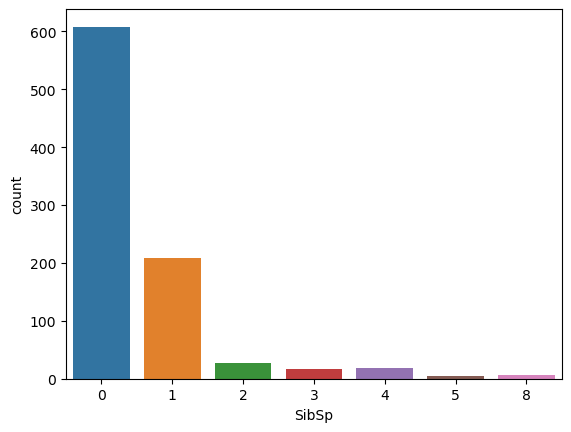

In [17]:
sns.countplot(x="SibSp", data=titanic_data)

## Data Wrangling

In [18]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

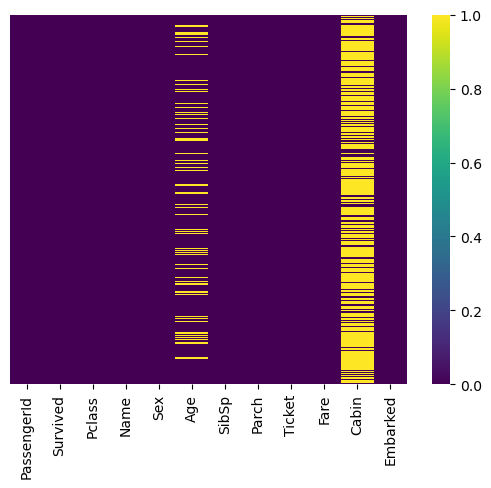

In [20]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")

<Axes: xlabel='Pclass', ylabel='Age'>

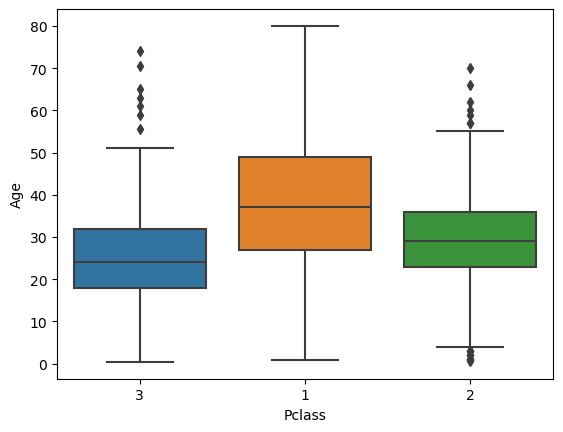

In [21]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data)

In [22]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
titanic_data.drop("Cabin", axis=1, inplace=True)

In [24]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
titanic_data.dropna(inplace=True)

<Axes: >

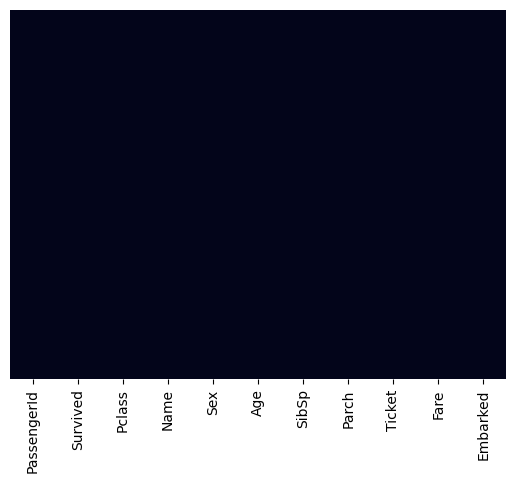

In [26]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [27]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True)
sex.head(5)

,male
0,True
1,False
2,False
3,False
4,True


In [28]:
embark = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
embark.head(5)

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [29]:
Pcl = pd.get_dummies(titanic_data['Pclass'], drop_first=True)
Pcl.head(5)

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True


In [30]:
titanic_data = pd.concat([titanic_data, sex, embark, Pcl], axis=1)

In [31]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,False,True,False,False,True
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,True,False,True,True,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,False,False,True,False,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,True,False,False,False,False


In [32]:
titanic_data.drop(['Sex', 'Embarked', 'PassengerId', 'Name', 'Ticket', 'Pclass'], axis=1, inplace=True)

In [33]:
titanic_data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


## Train Data

In [34]:
X = titanic_data.drop("Survived", axis=1)
y = titanic_data['Survived']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [37]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel = LogisticRegression(max_iter=1000)

In [42]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [40]:
X_train

,Age,SibSp,Parch,Fare,male,Q,S,2,3
699,42.0,0,0,7.6500,True,False,True,False,True
642,2.0,3,2,27.9000,False,False,True,False,True
434,50.0,1,0,55.9000,True,False,True,False,False
203,45.5,0,0,7.2250,True,False,False,False,True
586,47.0,0,0,15.0000,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...
182,9.0,4,2,31.3875,True,False,True,False,True
809,33.0,1,0,53.1000,False,False,True,False,False
94,59.0,0,0,7.2500,True,False,True,False,True
292,36.0,0,0,12.8750,True,False,False,True,False


In [43]:
predictions = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test, predictions)

array([[102,  24],
       [ 25,  63]], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test, predictions)

0.7710280373831776